# Wstępna ocena danych

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

NumPy: 1.26.4
Pandas: 2.2.2


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

print("Kształt danych:", df.shape)
print("Pierwsze wiersze:")
display(df.head())

print("Braki danych:")
print(df.isnull().sum())

print("Typy danych:")
print(df.dtypes)

display(df.describe())

corr = df.corr(numeric_only=True)
print("Korelacje z jakością snu:")
print(corr["Quality of Sleep"].sort_values(ascending=False))

Kształt danych: (374, 13)
Pierwsze wiersze:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Braki danych:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
Typy danych:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Korelacje z jakością snu:
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Person ID                  0.431612
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


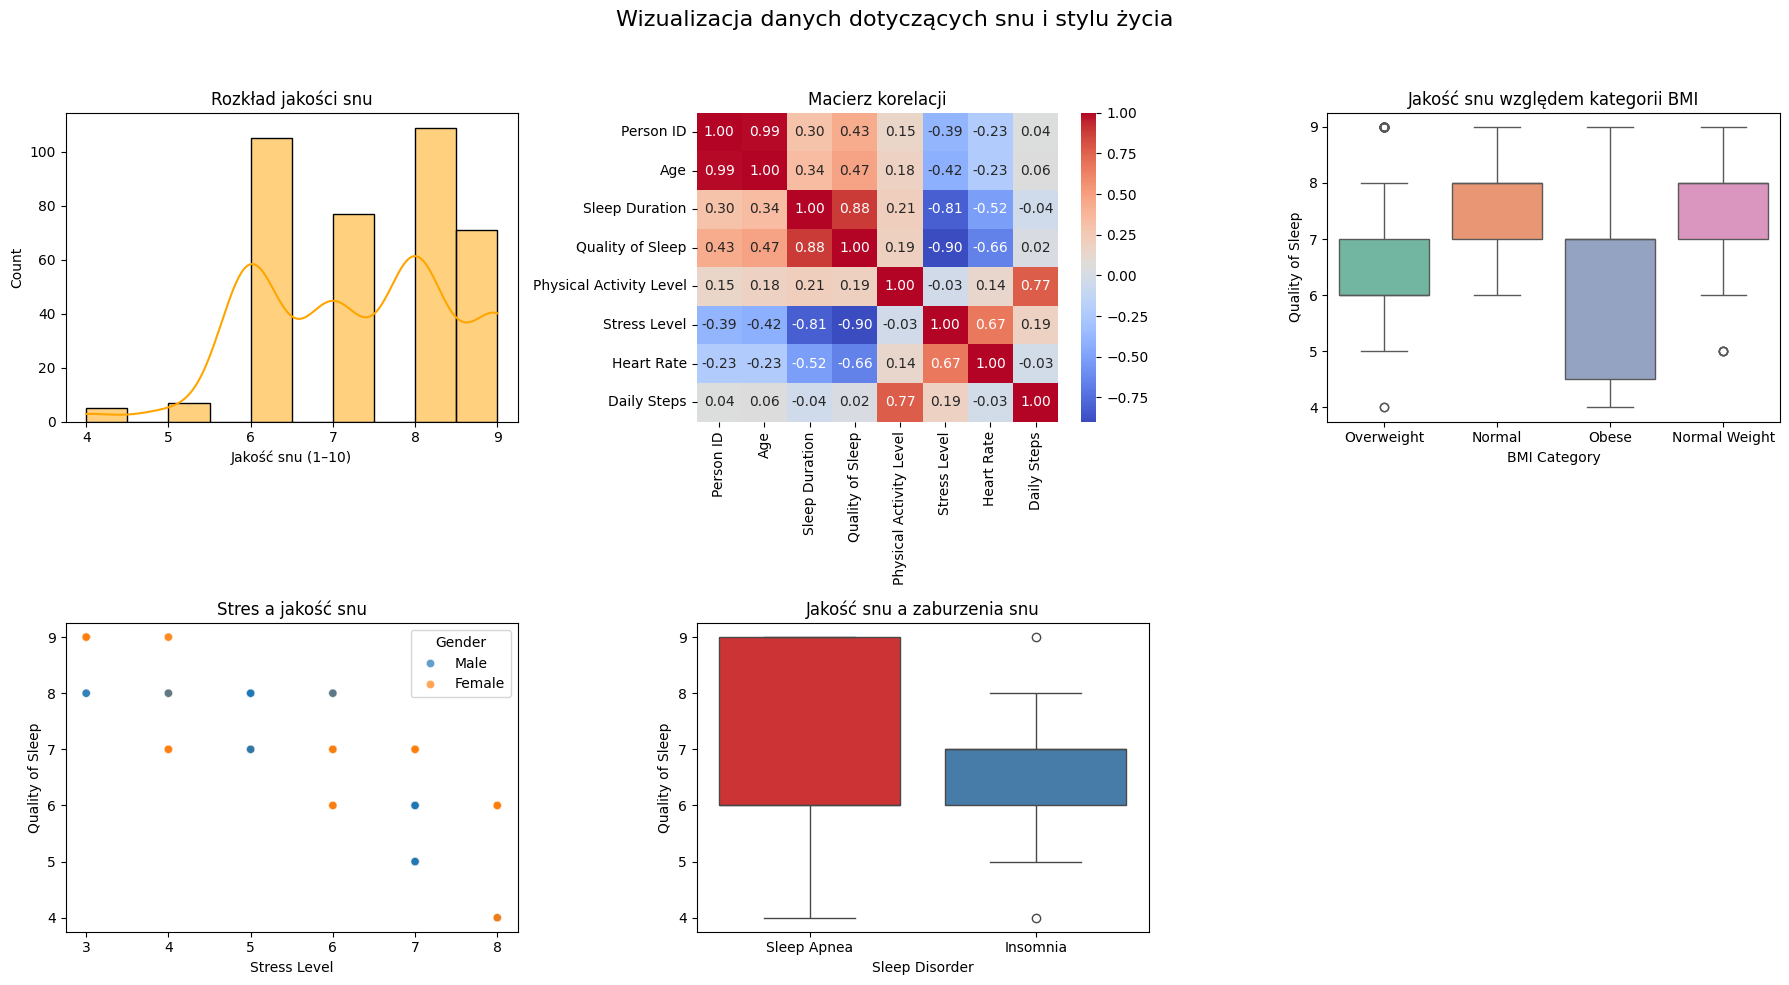

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Wizualizacja danych dotyczących snu i stylu życia", fontsize=16)

#Histogram jakości snu
sns.histplot(df["Quality of Sleep"], bins=10, kde=True, color="orange", ax=axes[0, 0])
axes[0, 0].set_title("Rozkład jakości snu")
axes[0, 0].set_xlabel("Jakość snu (1–10)")

#Heatmapa korelacji
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title("Macierz korelacji")

#Boxplot: BMI Category vs jakość snu
sns.boxplot(data=df, x="BMI Category", y="Quality of Sleep", hue="BMI Category",palette="Set2", ax=axes[0, 2], legend=False)
axes[0, 2].set_title("Jakość snu względem kategorii BMI")

#Scatterplot: stres vs jakość snu
sns.scatterplot(data=df, x="Stress Level", y="Quality of Sleep", hue="Gender", alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title("Stres a jakość snu")

#Boxplot: zaburzenia snu vs jakość snu (jeśli istnieje kolumna)
if "Sleep Disorder" in df.columns:
    sns.boxplot(data=df, x="Sleep Disorder", y="Quality of Sleep", hue="Sleep Disorder",palette="Set1", ax=axes[1, 1], legend=False)
    axes[1, 1].set_title("Jakość snu a zaburzenia snu")

fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Przygotowanie danych

In [13]:
df.drop(columns=["Person ID", "Blood Pressure"], inplace=True, errors='ignore')

categorical_cols = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("Quality of Sleep", axis=1)
y = df["Quality of Sleep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kształt danych treningowych:", X_train_scaled.shape)
print("Kształt danych testowych:", X_test_scaled.shape)

Kształt danych treningowych: (299, 10)
Kształt danych testowych: (75, 10)


# Modelowanie i Ewaluacja

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-10))) * 100

models = [
    ("Linear Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb),
    ("KNN Regressor", y_pred_knn),
    ("SVR (RBF Kernel)", y_pred_svr)
]

results = []
for name, y_pred in models:
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.append({
        "Model": name,
        "R2": round(r2, 3),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "MAPE (%)": round(mape, 2)
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

print('-------------------')

best_model = df_results.sort_values(by="R2", ascending=False).iloc[0]
print("Najlepszy model:")
print(f"Model: {best_model['Model']}")
print(f"R²: {best_model['R2']}")
print(f"RMSE: {best_model['RMSE']}")
print(f"MAPE: {best_model['MAPE (%)']}%")

            Model    R2   MAE  RMSE  MAPE (%)
Linear Regression 0.967 0.173 0.223      2.64
    Random Forest 0.993 0.033 0.105      0.63
          XGBoost 0.954 0.051 0.265      1.01
    KNN Regressor 0.982 0.043 0.167      0.79
 SVR (RBF Kernel) 0.962 0.111 0.239      1.98
-------------------
Najlepszy model:
Model: Random Forest
R²: 0.993
RMSE: 0.105
MAPE: 0.63%


# Wdrożenie / Prezentacja wyników

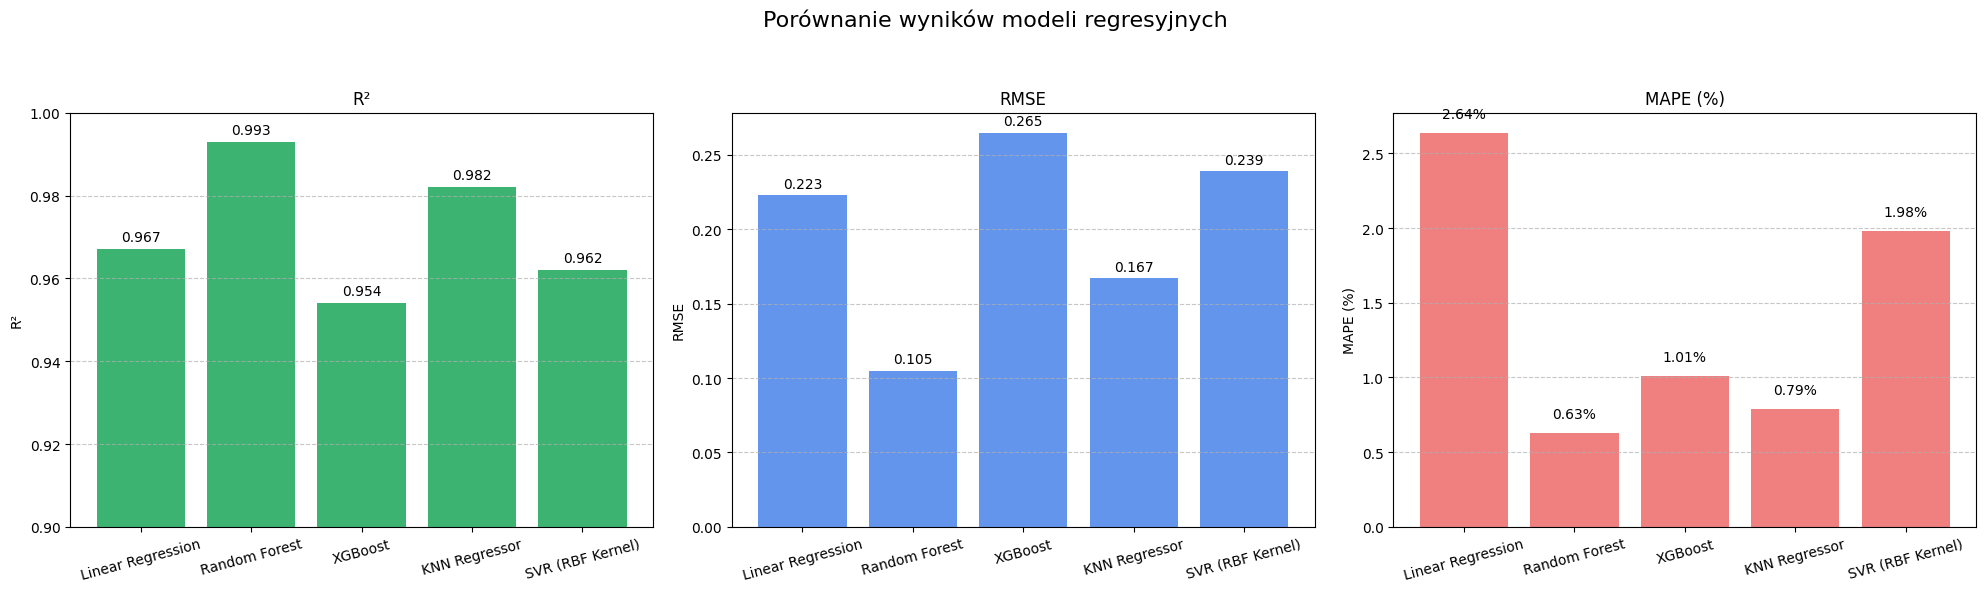

In [15]:
models = ["Linear Regression", "Random Forest", "XGBoost", "KNN Regressor", "SVR (RBF Kernel)"]
r2_scores = [0.967, 0.993, 0.954, 0.982, 0.962]
rmse_scores = [0.223, 0.105, 0.265, 0.167, 0.239]
mape_scores = [2.64, 0.63, 1.01, 0.79, 1.98]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Porównanie wyników modeli regresyjnych", fontsize=16)

bars1 = axes[0].bar(models, r2_scores, color='mediumseagreen')
axes[0].set_title("R²")
axes[0].set_ylim(0.9, 1.0)
axes[0].set_ylabel("R²")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, f"{bar.get_height():.3f}", ha='center')

bars2 = axes[1].bar(models, rmse_scores, color='cornflowerblue')
axes[1].set_title("RMSE")
axes[1].set_ylabel("RMSE")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.3f}", ha='center')

bars3 = axes[2].bar(models, mape_scores, color='lightcoral')
axes[2].set_title("MAPE (%)")
axes[2].set_ylabel("MAPE (%)")
axes[2].grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars3:
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{bar.get_height():.2f}%", ha='center')

for ax in axes:
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=15)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Rzeczywista vs Przewidywana jakość snu

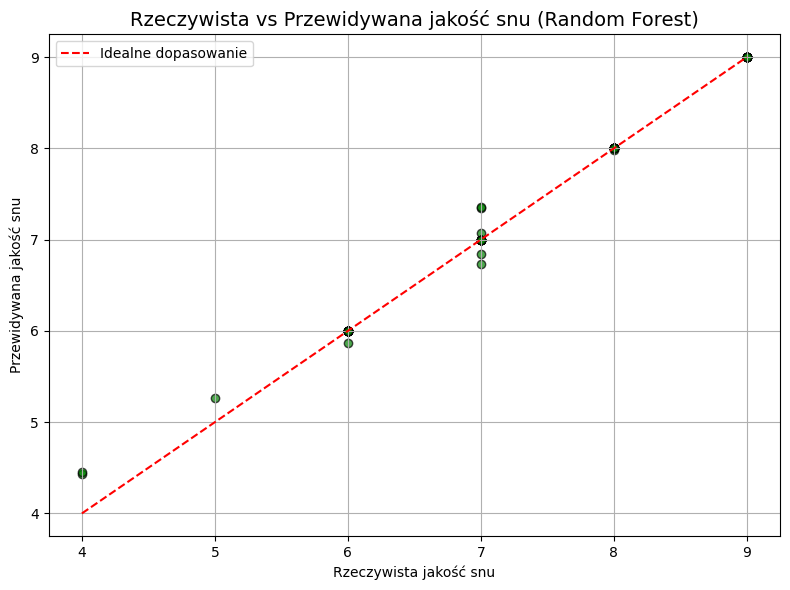

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Idealne dopasowanie')
plt.title("Rzeczywista vs Przewidywana jakość snu (Random Forest)", fontsize=14)
plt.xlabel("Rzeczywista jakość snu")
plt.ylabel("Przewidywana jakość snu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ważność cech

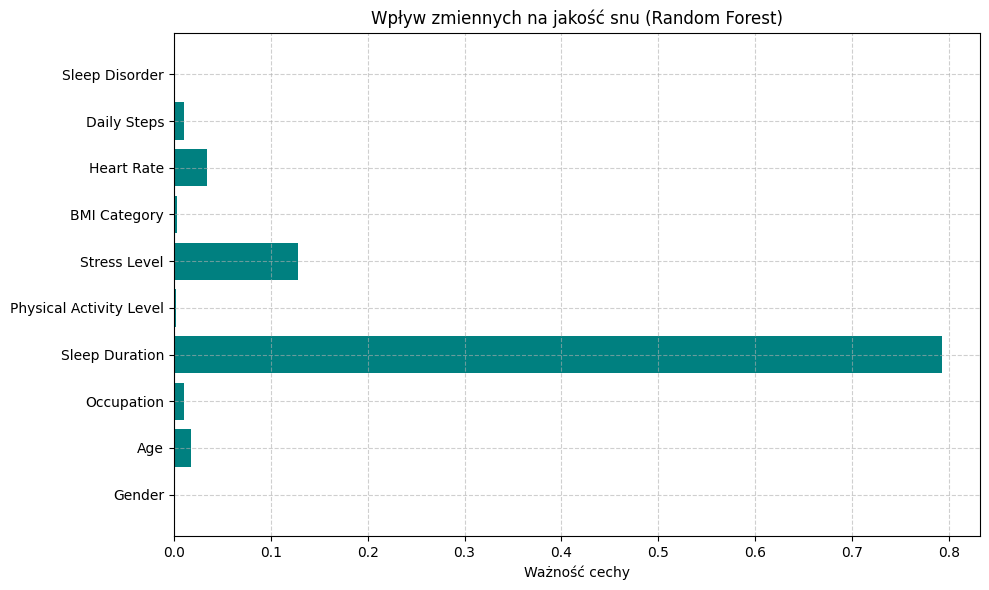

In [17]:
feature_importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='teal')
plt.xlabel("Ważność cechy")
plt.title("Wpływ zmiennych na jakość snu (Random Forest)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

 Rozkład błędów

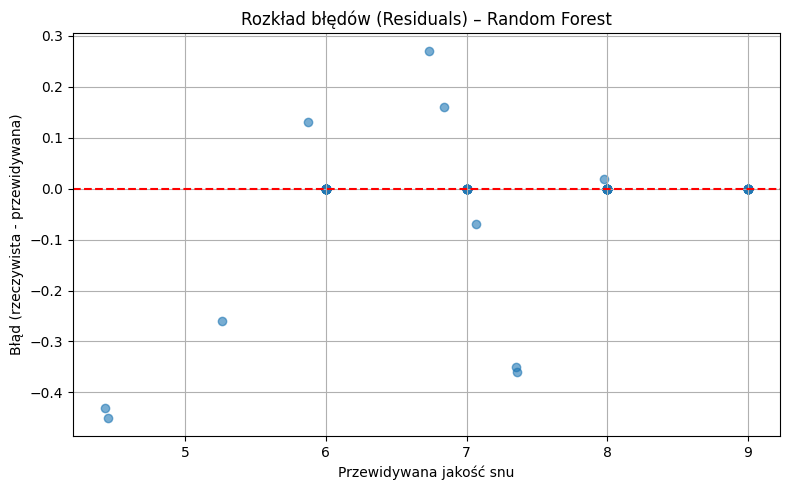

In [18]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Rozkład błędów (Residuals) – Random Forest")
plt.xlabel("Przewidywana jakość snu")
plt.ylabel("Błąd (rzeczywista - przewidywana)")
plt.grid(True)
plt.tight_layout()
plt.show()